In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [6]:
import pandas as pd

file_path = 'C:/Users/Lenovo/Desktop/DS/taxi_trip_pricing.csv'  # Remplacer par le chemin vers votre fichier Excel
data = pd.read_csv(file_path)
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [8]:
# Afficher les premières lignes du jeu de données
print(data.head())

# Afficher des informations sur le jeu de données
print(data.info())

# Afficher des statistiques descriptives
print(data.describe())

   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3                 11

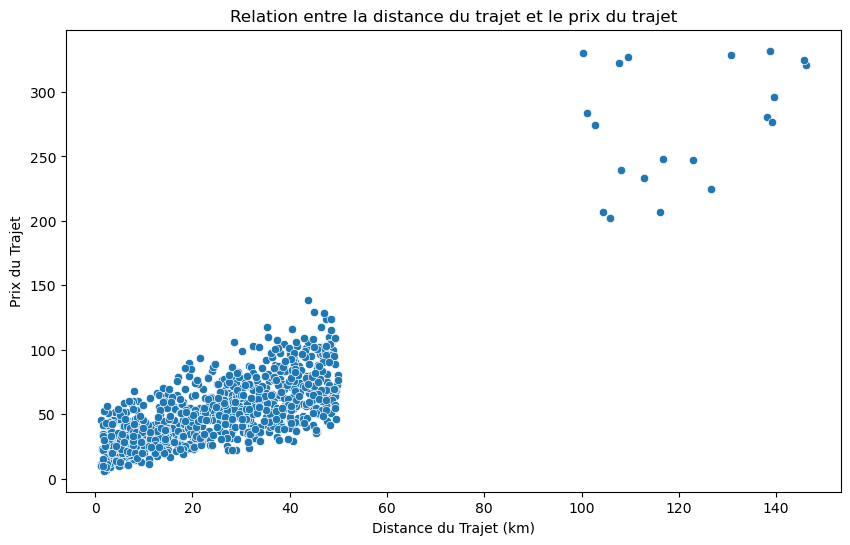

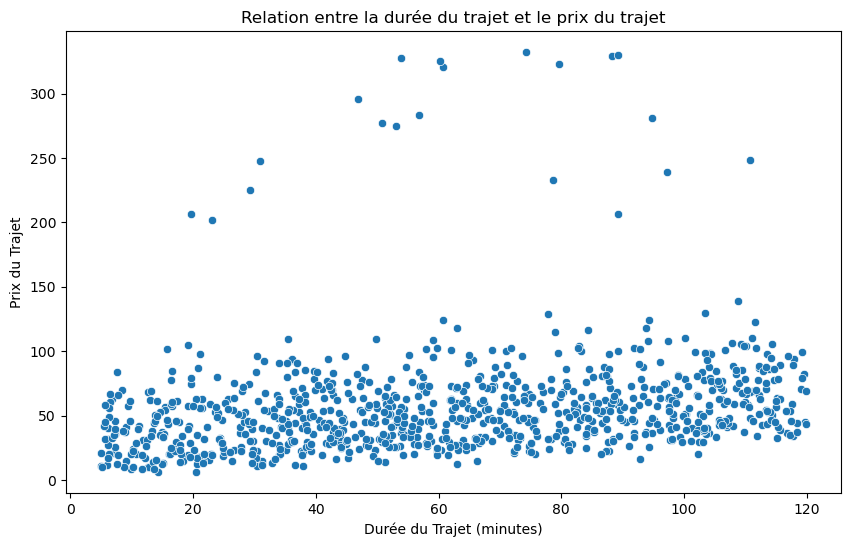

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Tracer la relation entre la distance du trajet et le prix du trajet
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trip_Distance_km', y='Trip_Price', data=data)
plt.title('Relation entre la distance du trajet et le prix du trajet')
plt.xlabel('Distance du Trajet (km)')
plt.ylabel('Prix du Trajet')
plt.show()

# Tracer la relation entre le temps du trajet et le prix du trajet
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Trip_Duration_Minutes', y='Trip_Price', data=data)
plt.title('Relation entre la durée du trajet et le prix du trajet')
plt.xlabel('Durée du Trajet (minutes)')
plt.ylabel('Prix du Trajet')
plt.show()

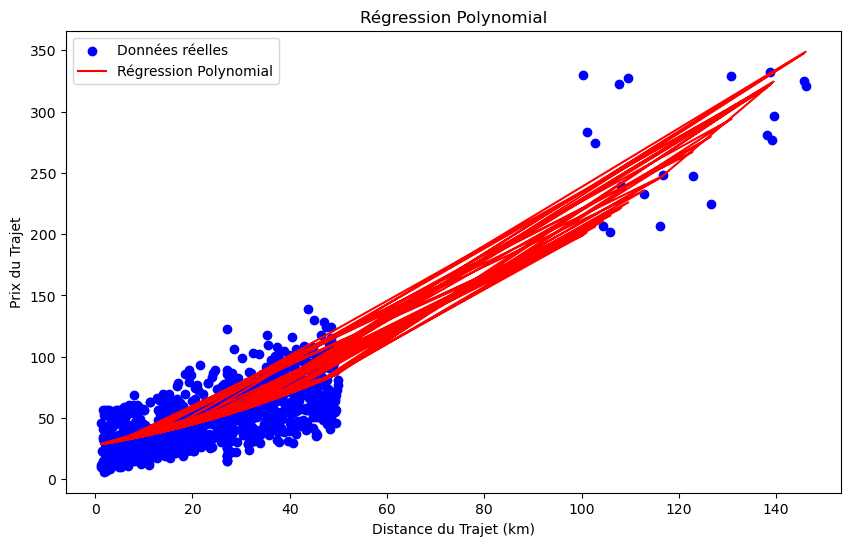

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Remplacer les valeurs manquantes par la moyenne des colonnes numériques
data.fillna(data.mean(numeric_only=True), inplace=True)

# Préparer les données pour la régression linéaire polynomial
X = data[['Trip_Distance_km']].values
y = data['Trip_Price'].values

# Appliquer la régression linéaire polynomial
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)

# Faire des prédictions
y_pred_poly = poly_model.predict(X)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Données réelles')
plt.plot(X, y_pred_poly, color='red', label='Régression Polynomial')
plt.title('Régression Polynomial')
plt.xlabel('Distance du Trajet (km)')
plt.ylabel('Prix du Trajet')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import r2_score

# Calculer le R²
r2 = r2_score(y, y_pred_poly)
print(f"Coefficient de détermination (R²) pour la régression polynomial : {r2:.2f}")

Coefficient de détermination (R²) pour la régression polynomial : 0.76


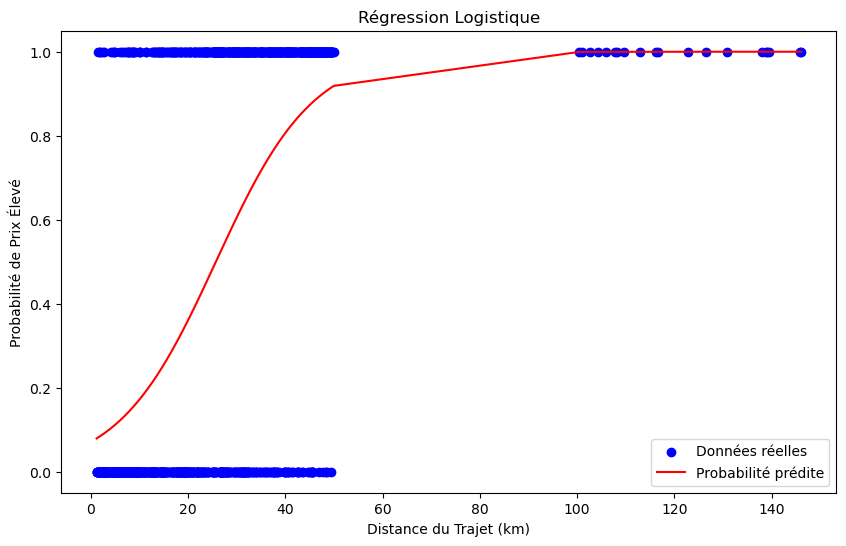

Matrice de Confusion:
 [[358 142]
 [115 385]]
Rapport de Classification:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       500
           1       0.73      0.77      0.75       500

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000



In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Créer une variable cible binaire
data['Trip_Price_Binary'] = (data['Trip_Price'] > data['Trip_Price'].median()).astype(int)
y_bin = data['Trip_Price_Binary'].values

# Appliquer la régression logistique
log_model = LogisticRegression()
log_model.fit(X, y_bin)

# Faire des prédictions de probabilités
y_pred_prob = log_model.predict_proba(X)[:, 1]

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.scatter(X, y_bin, color='blue', label='Données réelles')
plt.plot(np.sort(X, axis=0), y_pred_prob[np.argsort(X, axis=0)], color='red', label='Probabilité prédite')
plt.xlabel('Distance du Trajet (km)')
plt.ylabel('Probabilité de Prix Élevé')
plt.title('Régression Logistique')
plt.legend()
plt.show()

# Évaluer le modèle
conf_matrix = confusion_matrix(y_bin, log_model.predict(X))
print("Matrice de Confusion:\n", conf_matrix)
print("Rapport de Classification:\n", classification_report(y_bin, log_model.predict(X)))